## Advanced Linear Regression

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Test train split module
# RFE and LinearRegression
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split,GridSearchCV,KFold,cross_val_score
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.feature_selection import RFE
from sklearn.metrics import r2_score


In [3]:
df_hp = pd.read_csv("train.csv")

In [4]:
df_hp

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [5]:
df_hp.shape

(1460, 81)

In [6]:
df_hp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [7]:
df_hp.isnull().any()

Id               False
MSSubClass       False
MSZoning         False
LotFrontage       True
LotArea          False
                 ...  
MoSold           False
YrSold           False
SaleType         False
SaleCondition    False
SalePrice        False
Length: 81, dtype: bool

In [8]:
df_hp.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [9]:
#check if Nan values are their or not
round(100*(df_hp.isnull().sum()/len(df_hp.index)),2)

Id                0.00
MSSubClass        0.00
MSZoning          0.00
LotFrontage      17.74
LotArea           0.00
                 ...  
MoSold            0.00
YrSold            0.00
SaleType          0.00
SaleCondition     0.00
SalePrice         0.00
Length: 81, dtype: float64

In [10]:
#Check NaN values in Categorical variables
df_hp.select_dtypes(include='object').isnull().sum()[df_hp.select_dtypes(include='object').isnull().sum()>0]

Alley           1369
MasVnrType         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

In [11]:
#Finding missing data percentage
null_total = df_hp.isnull().sum().sort_values(ascending=False)
percentage = (df_hp.isnull().sum()/df_hp.isnull().count()).sort_values(ascending=False)
missing = pd.concat([null_total, percentage], axis=1, keys=['Total', 'Percentage'])
missing.head(20)

,Total,Percentage
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageCond,81,0.055479
GarageType,81,0.055479
GarageYrBlt,81,0.055479
GarageFinish,81,0.055479


As we can see from the above table that PoolQC, MiscFeature and Alley has missing values more than 90%. So, we decide to drop those features. And also we drop the 'ID' column as it is of no use for our model.

In [12]:
df_hp = df_hp.drop(['PoolQC', 'MiscFeature', 'Alley', 'Id'], axis=1)

In [13]:
round(df_hp.isnull().sum()/len(df_hp.index),2)[round(df_hp.isnull().sum()/
                                                                 len(df_hp.index),2).values>0.00]

LotFrontage     0.18
MasVnrType      0.01
MasVnrArea      0.01
BsmtQual        0.03
BsmtCond        0.03
BsmtExposure    0.03
BsmtFinType1    0.03
BsmtFinType2    0.03
FireplaceQu     0.47
GarageType      0.06
GarageYrBlt     0.06
GarageFinish    0.06
GarageQual      0.06
GarageCond      0.06
Fence           0.81
dtype: float64

In [14]:
# Replace NA with None in the following columns below : 

for cols in ('MasVnrType', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
            'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'Electrical'):
    
    df_hp[cols]=df_hp[cols].fillna('NA')

In [15]:
round(df_hp.isnull().sum()/len(df_hp.index),2)[round(df_hp.isnull().sum()/
                                                                 len(df_hp.index),2).values>0]

LotFrontage    0.18
MasVnrArea     0.01
FireplaceQu    0.47
GarageYrBlt    0.06
Fence          0.81
dtype: float64

In [16]:
# Fill the null values with median for LotFrontage and MasVnrArea columns

df_hp['LotFrontage'] = df_hp['LotFrontage'].replace(np.nan, df_hp['LotFrontage'].median())
df_hp['MasVnrArea'] = df_hp['MasVnrArea'].replace(np.nan, df_hp['MasVnrArea'].median())

In [17]:
# Set the null values with 0 for GarageYrBlt 
df_hp['GarageYrBlt']=df_hp['GarageYrBlt'].fillna(0)
df_hp['GarageYrBlt'] = df_hp['GarageYrBlt'].astype(int)

Handled all the missing values till now.

In [18]:
for col in ('FireplaceQu','Fence'):
    df_hp[col]=df_hp[col].fillna('NA')

In [19]:
round(df_hp.isnull().sum()/len(df_hp.index),2)[round(df_hp.isnull().sum()/
                                                                 len(df_hp.index),2).values>0.00]

Series([], dtype: float64)

In [20]:
#Create a new column to check whether the house has been remodelled or not.

def checkRemodel(row):
    if(row['YearBuilt'] == row['YearRemodAdd']):
        return 0
    elif(row['YearBuilt'] < row['YearRemodAdd']):
        return 1
    else:
        return 2
    
df_hp['Remodelled'] = df_hp.apply(checkRemodel, axis=1)
df_hp.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,ScreenPorch,PoolArea,Fence,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,Remodelled
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,NA,0,2,2008,WD,Normal,208500,0
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,NA,0,5,2007,WD,Normal,181500,0
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,NA,0,9,2008,WD,Normal,223500,1
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,0,0,NA,0,2,2006,WD,Abnorml,140000,1
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,NA,0,12,2008,WD,Normal,250000,0


In [21]:
# Create a new column to find the age of a particular building at the time of selling

def RemodeledOrBuilt(row):
    if(row['YearBuilt'] == row['YearRemodAdd']):
        return row['YrSold'] - row['YearBuilt']
    else:
        return row['YrSold'] - row['YearRemodAdd']
       
df_hp['RemodeledOrBuilt'] = df_hp.apply(RemodeledOrBuilt, axis=1)
df_hp.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,PoolArea,Fence,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,Remodelled,RemodeledOrBuilt
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,NA,0,2,2008,WD,Normal,208500,0,5
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,NA,0,5,2007,WD,Normal,181500,0,31
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,NA,0,9,2008,WD,Normal,223500,1,6
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,0,NA,0,2,2006,WD,Abnorml,140000,1,36
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,NA,0,12,2008,WD,Normal,250000,0,8


Now, create a new column where we can check if the Garage is old or not.
If GarageYrBuilt is less than year: 2000, than we will consider it as old (0) and more than year: 2000 will be cosidered as new(1). 
For GarageYrBuilt , where we have filled the missing values as 0 will also be considered as old.

In [22]:
def GarageConstruction(row):
    if row == 0:
        return 0
    elif row >= 1900 and row < 2000:        
        return 0
    else:   
        return 1
    
df_hp['OldOrNewGarage'] = df_hp['GarageYrBlt'].apply(GarageConstruction)
df_hp.head(10)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,Fence,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,Remodelled,RemodeledOrBuilt,OldOrNewGarage
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,NA,0,2,2008,WD,Normal,208500,0,5,1
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,NA,0,5,2007,WD,Normal,181500,0,31,0
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,NA,0,9,2008,WD,Normal,223500,1,6,1
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,NA,0,2,2006,WD,Abnorml,140000,1,36,0
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,NA,0,12,2008,WD,Normal,250000,0,8,1
5,50,RL,85.0,14115,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,MnPrv,700,10,2009,WD,Normal,143000,1,14,0
6,20,RL,75.0,10084,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,NA,0,8,2007,WD,Normal,307000,1,2,1
7,60,RL,69.0,10382,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,NA,350,11,2009,WD,Normal,200000,0,36,0
8,50,RM,51.0,6120,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,NA,0,4,2008,WD,Abnorml,129900,1,58,0
9,190,RL,50.0,7420,Pave,Reg,Lvl,AllPub,Corner,Gtl,...,NA,0,1,2008,WD,Normal,118000,1,58,0


Since we have created new features using YearBuilt, YearRemodAdd, YrSold and GarageYrBlt columns,so we can decide to drop these columns as the derived columns will only be used for further analysis in the model.

In [23]:
df_hp.drop(['YearBuilt', 'YearRemodAdd', 'YrSold', 'GarageYrBlt'], axis = 1, inplace = True)

In [24]:
df_hp.shape

(1460, 76)

Remove those columns which has one value repeating 1241 times or more than (1241/1450)*100 = 85%).
Also drop 'MoSold' as these feature will not be used for further analysis.

In [25]:
def getNumValueCounts():
    cols = []
    num_cols = df_hp.select_dtypes(include=['int64', 'float'])
    for col in (num_cols):
        if(df_hp[col].value_counts().max() >= 1241):
            cols.append(col)
    return cols

colsToBeDroped = getNumValueCounts()
df_hp.drop(colsToBeDroped, axis = 1, inplace = True)

In [26]:
df_hp.drop(['MoSold'], axis = 1, inplace = True)

In [27]:
df_hp.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,PavedDrive,WoodDeckSF,OpenPorchSF,Fence,SaleType,SaleCondition,SalePrice,Remodelled,RemodeledOrBuilt,OldOrNewGarage
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,Y,0,61,NA,WD,Normal,208500,0,5,1
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,Y,298,0,NA,WD,Normal,181500,0,31,0
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,Y,0,42,NA,WD,Normal,223500,1,6,1
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,Y,0,35,NA,WD,Abnorml,140000,1,36,0
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,Y,192,84,NA,WD,Normal,250000,0,8,1


In [28]:
#Check percentage of NaN values if their is any
percent = round(100*(df_hp.isnull().sum()/len(df_hp.index)), 2)
print(percent)

MSSubClass          0.0
MSZoning            0.0
LotFrontage         0.0
LotArea             0.0
Street              0.0
                   ... 
SaleCondition       0.0
SalePrice           0.0
Remodelled          0.0
RemodeledOrBuilt    0.0
OldOrNewGarage      0.0
Length: 66, dtype: float64


In [29]:
#Check Duplicates
df_hp[df_hp.duplicated(keep=False)]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,PavedDrive,WoodDeckSF,OpenPorchSF,Fence,SaleType,SaleCondition,SalePrice,Remodelled,RemodeledOrBuilt,OldOrNewGarage


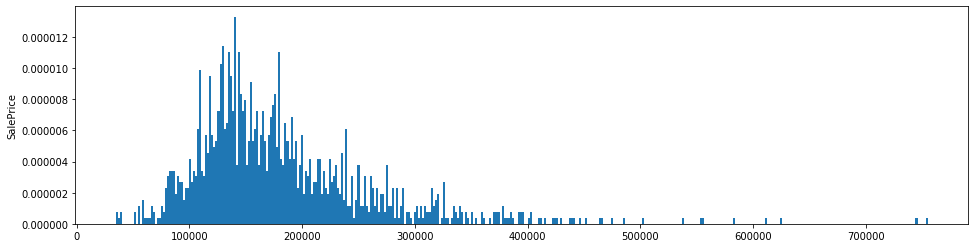

In [30]:
#Let's find out the outliers with respect to 'SalePrice'
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] =16.0
fig_size[1] = 4.0

x =df_hp['SalePrice']
plt.hist(x, normed=True, bins=400)
plt.ylabel('SalePrice');

In [31]:
df_hp.describe(percentiles=[.25,.5,.75,.90,.95,.99])

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,SalePrice,Remodelled,RemodeledOrBuilt,OldOrNewGarage
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,69.863699,10516.828082,6.099315,5.575342,103.117123,443.639726,567.240411,1057.429452,1162.626712,...,6.517808,0.613014,1.767123,472.980137,94.244521,46.660274,180921.195890,0.476712,22.950000,0.275342
std,42.300571,22.027677,9981.264932,1.382997,1.112799,180.731373,456.098091,441.866955,438.705324,386.587738,...,1.625393,0.644666,0.747315,213.804841,125.338794,66.256028,79442.502883,0.499629,20.640653,0.446840
min,20.000000,21.000000,1300.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,334.000000,...,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,34900.000000,0.000000,-1.000000,0.000000
25%,20.000000,60.000000,7553.500000,5.000000,5.000000,0.000000,0.000000,223.000000,795.750000,882.000000,...,5.000000,0.000000,1.000000,334.500000,0.000000,0.000000,129975.000000,0.000000,4.000000,0.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,0.000000,383.500000,477.500000,991.500000,1087.000000,...,6.000000,1.000000,2.000000,480.000000,0.000000,25.000000,163000.000000,0.000000,14.000000,0.000000
75%,70.000000,79.000000,11601.500000,7.000000,6.000000,164.250000,712.250000,808.000000,1298.250000,1391.250000,...,7.000000,1.000000,2.000000,576.000000,168.000000,68.000000,214000.000000,1.000000,41.000000,1.000000
90%,120.000000,92.000000,14381.700000,8.000000,7.000000,335.000000,1065.500000,1232.000000,1602.200000,1680.000000,...,9.000000,1.000000,3.000000,757.100000,262.000000,130.000000,278000.000000,1.000000,56.000000,1.000000
95%,160.000000,104.000000,17401.150000,8.000000,8.000000,456.000000,1274.000000,1468.000000,1753.000000,1831.250000,...,10.000000,2.000000,3.000000,850.100000,335.000000,175.050000,326100.000000,1.000000,58.000000,1.000000
99%,190.000000,137.410000,37567.640000,10.000000,9.000000,791.280000,1572.410000,1797.050000,2155.050000,2219.460000,...,11.000000,2.000000,3.000000,1002.790000,505.460000,285.820000,442567.010000,1.000000,60.000000,1.000000


In [32]:
numeric_vars = list(df_hp.columns[df_hp.dtypes != 'object'])
print(numeric_vars)

['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'MasVnrArea', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'SalePrice', 'Remodelled', 'RemodeledOrBuilt', 'OldOrNewGarage']


In [33]:
#Visualize the outliers
num_vars = ['LotArea', 'MasVnrArea', 'TotalBsmtSF', 'WoodDeckSF', 'OpenPorchSF']

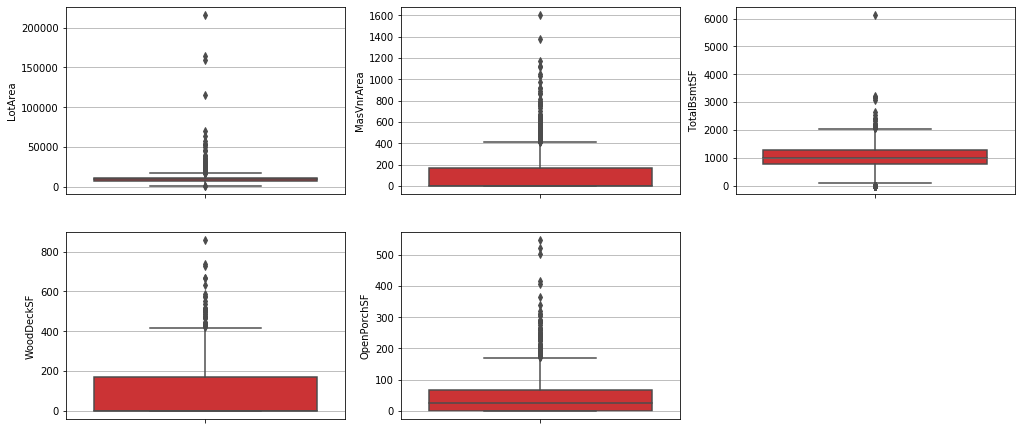

In [34]:
plt.figure(figsize=(17, 20))

for i, val in enumerate(num_vars): 
    plt.subplot(5,3,i+1)
    plt.grid(True)
    sns.boxplot(y=df_hp[val], palette='Set1')
    plt.xticks(rotation = 45)

plt.show()

In [35]:
# Removing Outliers where the values are more than 99%

quantile_TotalBsmtSF = df_hp['TotalBsmtSF'].quantile(0.99)
df_hp = df_hp[df_hp["TotalBsmtSF"] < quantile_TotalBsmtSF]

quantile_WoodDeckSF = df_hp['WoodDeckSF'].quantile(0.99)
df_hp = df_hp[df_hp["WoodDeckSF"] < quantile_WoodDeckSF]

quantile_OpenPorchSF = df_hp['OpenPorchSF'].quantile(0.99)
df_hp = df_hp[df_hp["OpenPorchSF"] < quantile_OpenPorchSF]

In [36]:
# Removing Outliers where the values are more than 98%

quantile_LotArea = df_hp['LotArea'].quantile(0.98)
df_hp = df_hp[df_hp["LotArea"] < quantile_LotArea]

quantile_MasVnrArea = df_hp['MasVnrArea'].quantile(0.98)
df_hp = df_hp[df_hp["MasVnrArea"] < quantile_MasVnrArea]

In [37]:
df_hp.shape

(1358, 66)

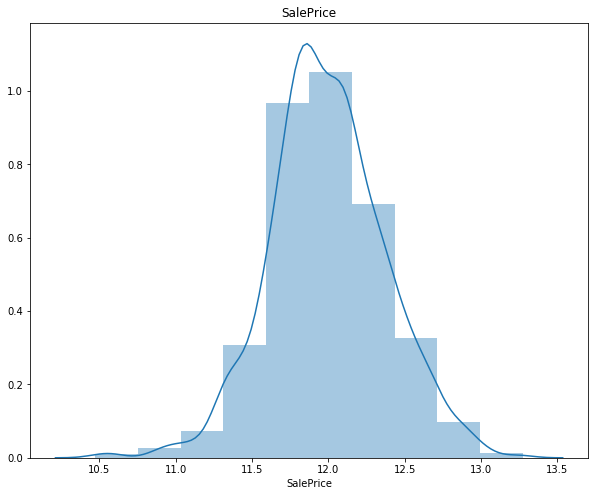

In [38]:
# Visualise the target variable: 'SalePrice' 
df_hp['SalePrice'] = np.log1p(df_hp['SalePrice'])
plt.figure(figsize=(10,8))
plt.title('SalePrice')
sns.distplot(df_hp['SalePrice'], bins=10)
plt.show()

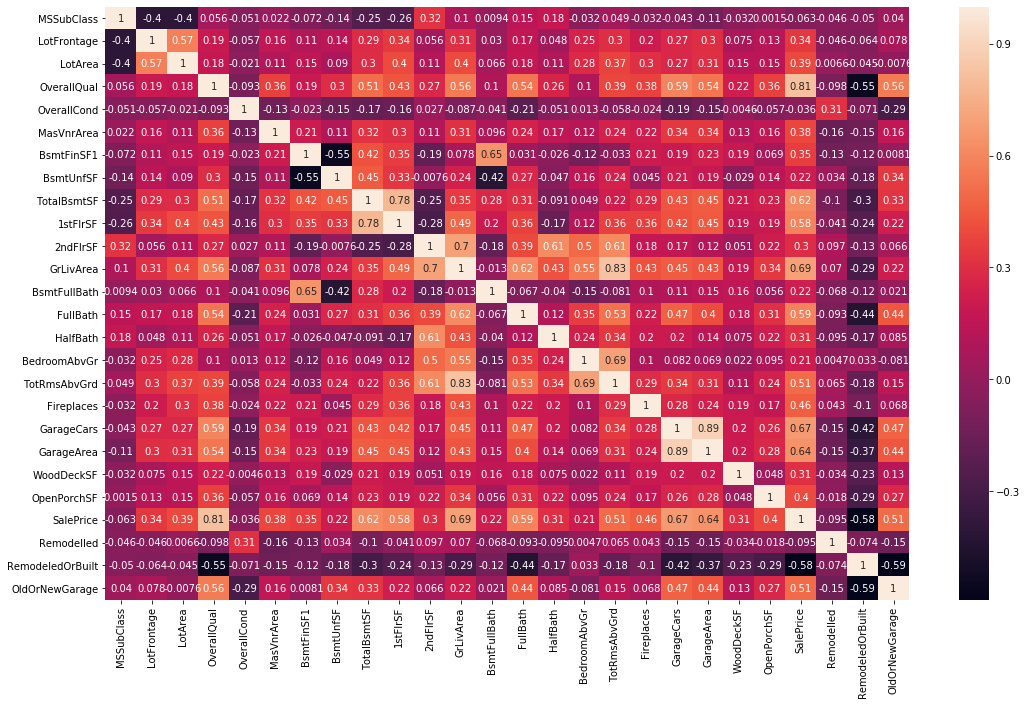

In [39]:
#Let's see the correlation amoung the numeric variables
plt.figure(figsize = (18,24))
plt.subplot(2, 1, 1)
sns.heatmap(df_hp.corr(), annot =  True)
plt.show()

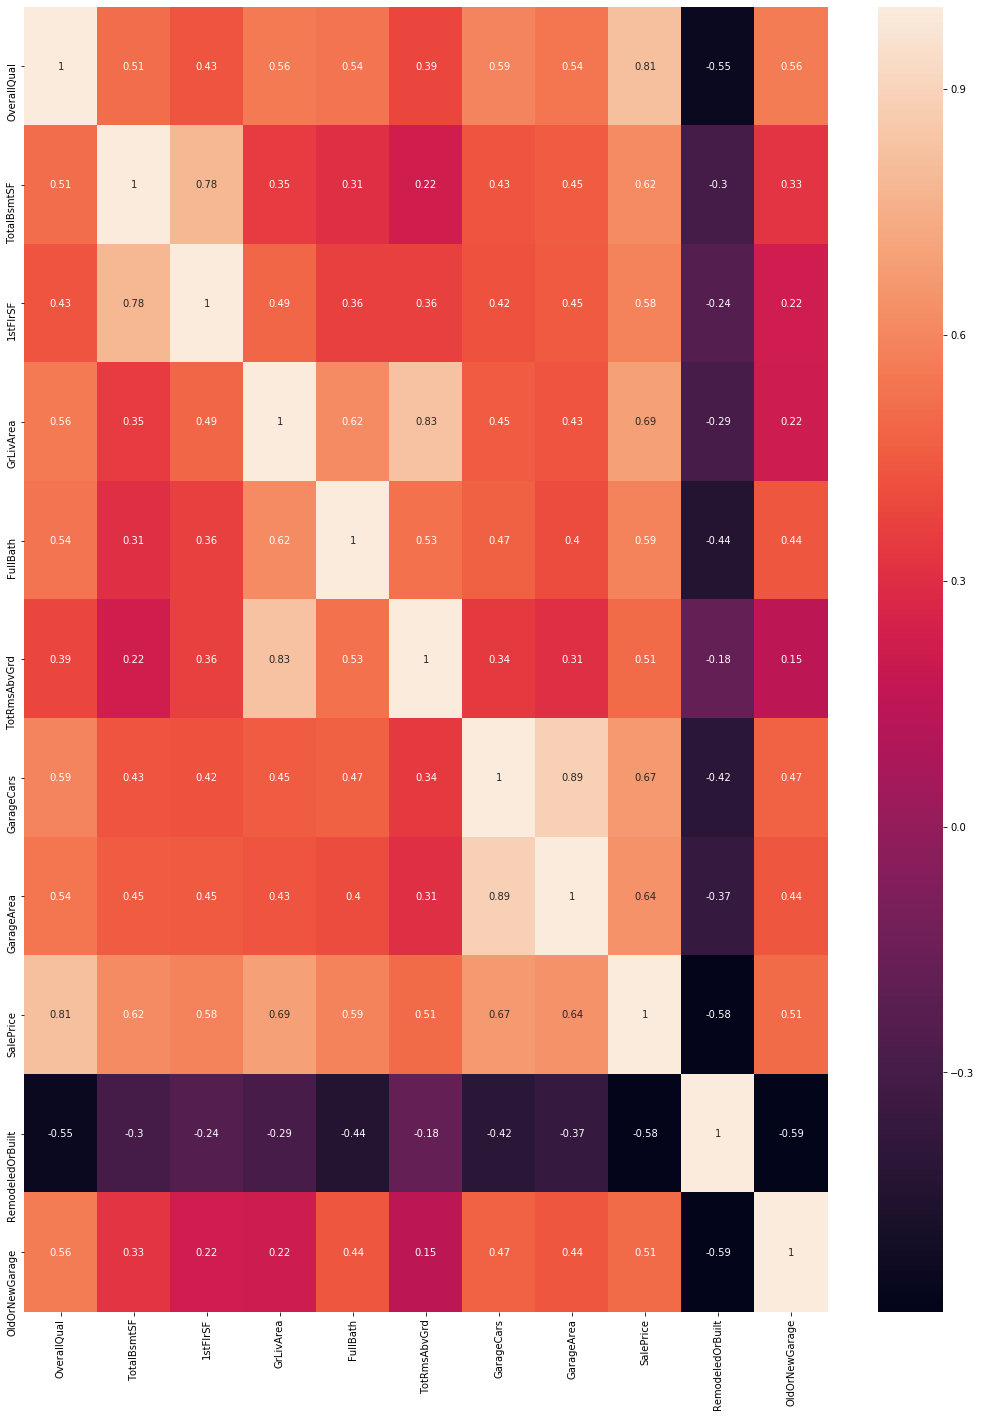

In [40]:
#Let's check the most correlated features:
corr_matrix = df_hp.corr()
top_corr = corr_matrix.index[abs(corr_matrix['SalePrice'])> 0.5]
plt.figure(figsize=(18,24))
g = sns.heatmap(df_hp[top_corr].corr(),annot=True)

"TotRmsAbvGrd and GrLivArea" has higher correlation: 83% and Garage Area and Garage Cars also has higher correlation: 89%.
So, we decide to remove the columns.

In [41]:
df_hp.drop(['TotRmsAbvGrd', 'GarageArea'], axis = 1, inplace = True)

In [42]:
round(df_hp.isnull().sum()/len(df_hp.index),2)[round(df_hp.isnull().sum()/
                                                                 len(df_hp.index),2).values>0.00]

Series([], dtype: float64)

In [43]:
# For all values that can be ordered, we have categorised them with an ordered sequence value
# For all values that cannot be ordered, we have categorised them with 0 and 1


df_hp['r_LotShape'] = df_hp['LotShape'].map({'Reg': 3, 'IR1': 2, 'IR2': 1, 'IR3': 0})
df_hp['r_ExterQual'] = df_hp['ExterQual'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'NA': 0 })
df_hp['r_BsmtQual'] = df_hp['BsmtQual'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'NA': 0})
df_hp['r_BsmtExposure'] = df_hp['BsmtExposure'].map({'Gd': 4, 'Av': 3, 'Mn': 2, 'No': 1, 'NA': 0})
df_hp['r_BsmtFinType1'] = df_hp['BsmtFinType1'].map({'GLQ': 6, 'ALQ': 5, 'BLQ': 4, 'Rec': 3, 'LwQ': 2, 'Unf': 1, 
                                                                 'NA': 0})
df_hp['r_HeatingQC'] = df_hp['HeatingQC'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'NA': 0})
df_hp['r_KitchenQual'] = df_hp['KitchenQual'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'NA': 0})
df_hp['r_FireplaceQu'] = df_hp['FireplaceQu'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'NA': 0})
df_hp['r_GarageFinish'] = df_hp['GarageFinish'].map({'Fin': 3, 'RFn': 2, 'Unf': 1, 'NA': 0 })
df_hp['r_BldgType'] = df_hp['BldgType'].map({'Twnhs': 5, 'TwnhsE': 4, 'Duplex': 3, '2fmCon': 2, '1Fam': 1, 
                                                                 'NA': 0 })
df_hp['r_HouseStyle'] = df_hp['HouseStyle'].map({'SLvl': 8, 'SFoyer': 7, '2.5Fin': 6, '2.5Unf': 5, '2Story': 4, 
                                                                 '1.5Fin': 3, '1.5Unf': 2, '1Story': 1, 'NA': 0 })
df_hp['r_Fence'] = df_hp['Fence'].map({'GdPrv': 4, 'GdWo': 3, 'MnPrv': 2, 'MnWw': 1, 'NA': 0 })
df_hp['r_LotConfig'] = df_hp['LotConfig'].map({'Inside': 5, 'Corner': 4, 'CulDSac': 3, 'FR2': 2, 'FR3': 1, 
                                                           'NA': 0  })
df_hp['r_MasVnrType'] = df_hp['MasVnrType'].map({'BrkCmn': 1, 'BrkFace': 1, 'CBlock': 1, 'Stone': 1, 'NA': 0 })
df_hp['r_SaleCondition'] = df_hp['SaleCondition'].map({'Normal': 1, 'Partial': 1, 'Abnorml': 0, 'Family': 0, 
                                                                   'Alloca': 0, 'AdjLand': 0, 'NA': 0})

In [44]:
df_hp.shape

(1358, 79)

In [45]:
round(df_hp.isnull().sum()/len(df_hp.index),2)[round(df_hp.isnull().sum()/
                                                                 len(df_hp.index),2).values>0.00]

r_MasVnrType    0.6
dtype: float64

In [46]:
#Set NaN values of 'r_MasVnrType' column with 0
df_hp['r_MasVnrType']=df_hp['r_MasVnrType'].fillna(0)
df_hp['r_MasVnrType'] = df_hp['r_MasVnrType'].astype(float)

In [47]:
# drop the old columns 
df_hp = df_hp.drop(['LotShape', 'ExterQual', 'BsmtQual', 'BsmtExposure', 'BsmtFinType1', 'HeatingQC', 
                                'KitchenQual', 'GarageFinish', 'BldgType', 'HouseStyle',  
                                'LotConfig', 'MasVnrType', 'SaleCondition','Fence', 'FireplaceQu'], axis=1)

In [48]:
round(df_hp.isnull().sum()/len(df_hp.index),2)[round(df_hp.isnull().sum()/
                                                                 len(df_hp.index),2).values>0.00]

Series([], dtype: float64)

In [49]:
df_hp.shape

(1358, 64)

Now, lets create dummies.

In [50]:
dummy_var = pd.get_dummies(df_hp[['MSZoning','Neighborhood',
             'RoofStyle','Exterior1st', 'Exterior2nd','Foundation',
             'GarageType']],
                           drop_first=True)

df_hp = pd.concat([df_hp,dummy_var],axis='columns')

df_hp = df_hp.drop(['MSZoning','Neighborhood',
             'RoofStyle','Exterior1st', 'Exterior2nd','Foundation',
             'GarageType'],axis='columns')


In [51]:
df_hp.head()

,MSSubClass,LotFrontage,LotArea,Street,LandContour,Utilities,LandSlope,Condition1,Condition2,OverallQual,...,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_NA
0,60,65.0,8450,Pave,Lvl,AllPub,Gtl,Norm,Norm,7,...,1,0,0,0,1,0,0,0,0,0
1,20,80.0,9600,Pave,Lvl,AllPub,Gtl,Feedr,Norm,6,...,0,0,0,0,1,0,0,0,0,0
2,60,68.0,11250,Pave,Lvl,AllPub,Gtl,Norm,Norm,7,...,1,0,0,0,1,0,0,0,0,0
3,70,60.0,9550,Pave,Lvl,AllPub,Gtl,Norm,Norm,7,...,0,0,0,0,0,0,0,0,1,0
4,60,84.0,14260,Pave,Lvl,AllPub,Gtl,Norm,Norm,8,...,1,0,0,0,1,0,0,0,0,0


In [52]:
df_hp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1358 entries, 0 to 1458
Columns: 130 entries, MSSubClass to GarageType_NA
dtypes: float64(4), int64(35), object(18), uint8(73)
memory usage: 712.2+ KB


### Remove all the unnessecary columns which will not help further.

In [53]:
df_hp.drop(['Street', 'LandContour', 'Utilities', 'LandSlope','Condition1', 'Condition2', 'RoofMatl', 'ExterCond',
'BsmtCond','BsmtFinType2','Heating','Functional','GarageQual','GarageCond',
'PavedDrive','SaleType'], axis = 1, inplace = True)


In [54]:
df_hp.drop(['CentralAir', 'Electrical'], axis = 1, inplace = True)

In [55]:
df_hp.shape

(1358, 112)

## Train Test Split

In [56]:
# Putting all feature variables to f

f = df_hp.drop(['SalePrice'], axis=1)
f.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_NA
0,60,65.0,8450,7,5,196.0,706,150,856,856,...,1,0,0,0,1,0,0,0,0,0
1,20,80.0,9600,6,8,0.0,978,284,1262,1262,...,0,0,0,0,1,0,0,0,0,0
2,60,68.0,11250,7,5,162.0,486,434,920,920,...,1,0,0,0,1,0,0,0,0,0
3,70,60.0,9550,7,5,0.0,216,540,756,961,...,0,0,0,0,0,0,0,0,1,0
4,60,84.0,14260,8,5,350.0,655,490,1145,1145,...,1,0,0,0,1,0,0,0,0,0


In [57]:
# Putting dependent variable to d

d = df_hp['SalePrice']
d.head()

0    12.247699
1    12.109016
2    12.317171
3    11.849405
4    12.429220
Name: SalePrice, dtype: float64

#### Feature Scaling

In [60]:
from sklearn.preprocessing import scale

cols = f.columns
f = pd.DataFrame(scale(f))
f.columns = cols
f.columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'MasVnrArea', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       ...
       'Foundation_PConc', 'Foundation_Slab', 'Foundation_Stone',
       'Foundation_Wood', 'GarageType_Attchd', 'GarageType_Basment',
       'GarageType_BuiltIn', 'GarageType_CarPort', 'GarageType_Detchd',
       'GarageType_NA'],
      dtype='object', length=111)

In [62]:
# Train and Test split

np.random.seed(0)
X_train, X_test, y_train, y_test = train_test_split(f, d, train_size=0.7, test_size = 0.3, random_state=42)

### RFE

In [63]:
# Running RFE with the output number of the variable equal to 50

lm = LinearRegression()
lm.fit(X_train, y_train)

# running RFE
rfe = RFE(lm, 50)            
rfe = rfe.fit(X_train, y_train)

In [64]:
# Assign the columns selected by RFE to a new variable 'cols'

cols = X_train.columns[rfe.support_]

# Assign the best 50 features to a dataframe and view them

df_1 = pd.DataFrame(list(zip(X_train.columns,rfe.support_,rfe.ranking_)), columns=['Variable', 'rfe_support', 'rfe_ranking'])
df_1 = df_1.loc[df_1['rfe_support'] == True]
df_1.reset_index(drop=True, inplace=True)

df_1

,Variable,rfe_support,rfe_ranking
0,LotArea,True,1
1,OverallQual,True,1
2,OverallCond,True,1
3,BsmtFinSF1,True,1
4,TotalBsmtSF,True,1
5,GrLivArea,True,1
6,BsmtFullBath,True,1
7,FullBath,True,1
8,HalfBath,True,1
9,GarageCars,True,1


In [66]:
# Assign the new 50 columns to X_train_rfe

X_train_rfe = X_train[cols]

In [67]:
# Assign the new 50 columns to X_train and X_test for further analysis

X_train = X_train_rfe[X_train_rfe.columns]
X_test =  X_test[X_train.columns]

### Ridge And Lasso Regression

#### Lasso

In [68]:
lasso = Lasso()

# list of alphas

params = {'alpha': [0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.001, 0.002, 0.003, 0.004, 0.005, 0.01]}

# cross validation

folds = 5
las_model_cv = GridSearchCV(estimator = lasso,                         
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

las_model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 11 candidates, totalling 55 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  55 out of  55 | elapsed:    0.5s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.0002, 0.0003, 0.0004, 0.0005,
                                   0.001, 0.002, 0.003, 0.004, 0.005, 0.01]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_absolute_error', verbose=1)

In [69]:
# View mean scores
lasso_cv_res = pd.DataFrame(las_model_cv.cv_results_)
lasso_cv_res[['param_alpha', 'mean_train_score', 'mean_test_score', 'rank_test_score']].sort_values(by = ['rank_test_score'])

,param_alpha,mean_train_score,mean_test_score,rank_test_score
0,0.0001,-0.076172,-0.083605,1
1,0.0002,-0.076233,-0.083629,2
2,0.0003,-0.076321,-0.083640,3
3,0.0004,-0.076444,-0.083675,4
4,0.0005,-0.076628,-0.083787,5
5,0.001,-0.077323,-0.084018,6
7,0.003,-0.078679,-0.084044,7
6,0.002,-0.078092,-0.084068,8
8,0.004,-0.079164,-0.084233,9
9,0.005,-0.079768,-0.084581,10


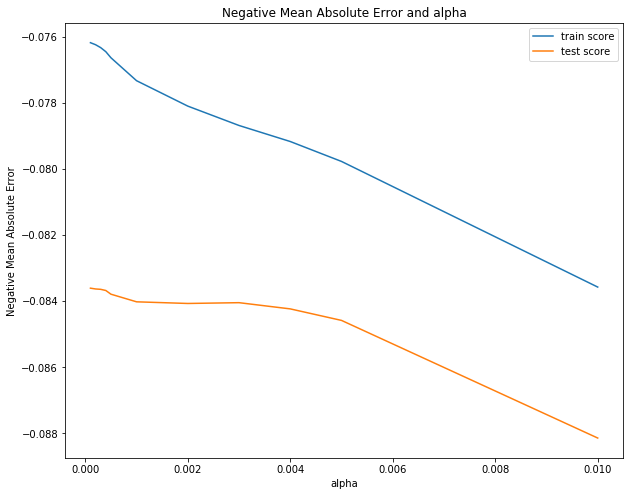

In [71]:
# plot mean test and train scores with alpha 

lasso_cv_res['param_alpha'] = lasso_cv_res['param_alpha'].astype('float64')


plt.figure(figsize=(10,8))

plt.plot(lasso_cv_res['param_alpha'], lasso_cv_res['mean_train_score'])
plt.plot(lasso_cv_res['param_alpha'], lasso_cv_res['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In [72]:
# Let's find the best estimator for lambda

las_model_cv.best_estimator_

Lasso(alpha=0.0001, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [73]:
# check the coefficient values with lambda = 0.0001

alpha = 0.0001

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 
lasso.coef_

array([ 0.02290106,  0.07438143,  0.04588677,  0.03350602,  0.05236848,
        0.10317264,  0.01090965,  0.01405641,  0.01756853,  0.03957782,
        0.01233834,  0.01069582, -0.01455814, -0.02477029,  0.01739454,
        0.01107357,  0.00966285,  0.02123036,  0.01661045,  0.01172902,
       -0.02330014,  0.01749347,  0.06033804,  0.02399569,  0.09741403,
        0.07481504,  0.02317192, -0.00854354,  0.01973515, -0.01835197,
        0.01760227, -0.06712451, -0.0124376 , -0.06394365, -0.00988749,
       -0.00863447, -0.01336274,  0.01040849, -0.02431248, -0.03556001,
       -0.03348829,  0.02389403,  0.0321189 ,  0.0233509 ,  0.01845803,
        0.03392221,  0.01517358,  0.02388626,  0.01159848,  0.01563411])

In [75]:
# Find the mean squared error
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, lasso.predict(X_test))

0.01331303924000095

In [76]:
# Put the shortlisted Features and coefficients in a new dataframe

las_df = pd.DataFrame({'Features':X_train.columns, 'Coefficient':lasso.coef_.round(4)})
las_df = las_df[las_df['Coefficient'] != 0.00]
las_df.reset_index(drop=True, inplace=True)
las_df

,Features,Coefficient
0,LotArea,0.0229
1,OverallQual,0.0744
2,OverallCond,0.0459
3,BsmtFinSF1,0.0335
4,TotalBsmtSF,0.0524
5,GrLivArea,0.1032
6,BsmtFullBath,0.0109
7,FullBath,0.0141
8,HalfBath,0.0176
9,GarageCars,0.0396


In [77]:
# Keep the Features and Coefficients in a dictionary

lasso_coef_dict = dict(pd.Series(lasso.coef_, index = X_train.columns))
lasso_coef_dict

{'LotArea': 0.022901059205384496,
 'OverallQual': 0.07438143270811032,
 'OverallCond': 0.0458867715680234,
 'BsmtFinSF1': 0.033506022124885015,
 'TotalBsmtSF': 0.052368480040928866,
 'GrLivArea': 0.10317263835543627,
 'BsmtFullBath': 0.010909645296396837,
 'FullBath': 0.014056408441358414,
 'HalfBath': 0.017568528539157274,
 'GarageCars': 0.03957781871318122,
 'WoodDeckSF': 0.01233833572596874,
 'OpenPorchSF': 0.010695823734574969,
 'Remodelled': -0.01455814137075627,
 'RemodeledOrBuilt': -0.024770294997745988,
 'OldOrNewGarage': 0.017394543275349474,
 'r_BsmtQual': 0.011073565649229332,
 'r_BsmtExposure': 0.009662845517896968,
 'r_HeatingQC': 0.021230363543364075,
 'r_KitchenQual': 0.01661044506858607,
 'r_FireplaceQu': 0.011729019230316991,
 'r_BldgType': -0.02330014475700387,
 'r_SaleCondition': 0.017493466198432873,
 'MSZoning_FV': 0.06033803936349686,
 'MSZoning_RH': 0.023995688240811414,
 'MSZoning_RL': 0.09741403357459091,
 'MSZoning_RM': 0.07481503840470231,
 'Neighborhood_Craw

In [78]:
# Check RFE to minimise the features to 15

X_train_lasso = X_train[las_df.Features]

lm = LinearRegression()
lm.fit(X_train_lasso, y_train)

# running RFE

rfe = RFE(lm, 15)            
rfe = rfe.fit(X_train_lasso, y_train)

In [79]:
def find(x):
    return lasso_coef_dict[x]

# Assign top 10 features to a temporary dataframe for further analysis

df_2 = pd.DataFrame(list(zip( X_train_lasso.columns, rfe.support_, rfe.ranking_)), columns=['Features', 'rfe_support', 'rfe_ranking'])
df_2 = df_2.loc[df_2['rfe_support'] == True]
df_2.reset_index(drop=True, inplace=True)

df_2['Coefficient'] = df_2['Features'].apply(find)
df_2 = df_2.sort_values(by=['Coefficient'], ascending=False)
df_2 = df_2.head(10)
df_2

,Features,rfe_support,rfe_ranking,Coefficient
5,GrLivArea,True,1,0.103173
11,MSZoning_RL,True,1,0.097414
12,MSZoning_RM,True,1,0.074815
1,OverallQual,True,1,0.074381
9,MSZoning_FV,True,1,0.060338
4,TotalBsmtSF,True,1,0.052368
2,OverallCond,True,1,0.045887
6,GarageCars,True,1,0.039578
14,Foundation_PConc,True,1,0.033922
3,BsmtFinSF1,True,1,0.033506


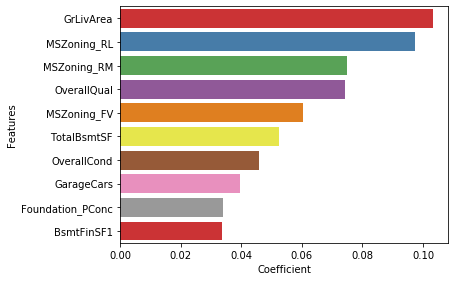

In [82]:
# Bar plot using lasso regression to determine the variables that would affect pricing of houses mostly

plt.figure(figsize=(20,20))
plt.subplot(4,3,1)
sns.barplot(y = 'Features', x='Coefficient', palette='Set1', data = df_2)
plt.show()

Above are the top 10 significant variables for predicting the price of a house using Lasso Regression.

#### Ridge 

In [83]:
# list pf alphas

params = {'alpha': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 
                    9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge = Ridge()

# cross validation

folds = 5
rid_model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
rid_model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 27 candidates, totalling 135 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 135 out of 135 | elapsed:    0.9s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5,
                                   0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0,
                                   6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500,
                                   1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_absolute_error', verbose=1)

In [84]:
# Getting the mean scores

ridge_cv_res = pd.DataFrame(rid_model_cv.cv_results_)
ridge_cv_res = ridge_cv_res[ridge_cv_res['param_alpha']<=500]
ridge_cv_res[['param_alpha', 'mean_train_score', 'mean_test_score', 'rank_test_score']].sort_values(by = ['rank_test_score'])

,param_alpha,mean_train_score,mean_test_score,rank_test_score
21,10,-0.076456,-0.083356,1
20,9,-0.076419,-0.083359,2
19,8,-0.076383,-0.083361,3
18,7,-0.076345,-0.083364,4
17,6,-0.076309,-0.083365,5
16,5,-0.076275,-0.083365,6
15,4,-0.076239,-0.083375,7
22,20,-0.076755,-0.083383,8
14,3,-0.076203,-0.083401,9
13,2,-0.076177,-0.083442,10


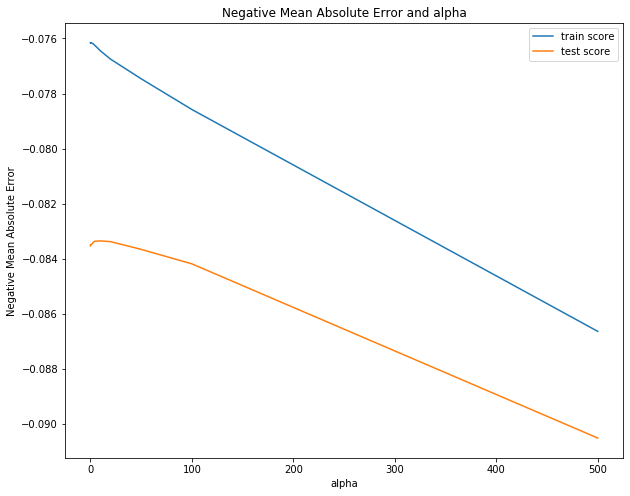

In [85]:
# plotting mean test and train scoes with alpha 

ridge_cv_res['param_alpha'] = ridge_cv_res['param_alpha'].astype('int32')


plt.figure(figsize=(10,8))
plt.plot(ridge_cv_res['param_alpha'], ridge_cv_res['mean_train_score'])
plt.plot(ridge_cv_res['param_alpha'], ridge_cv_res['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In [86]:
# Let's find the best estimator for lambda

rid_model_cv.best_estimator_

Ridge(alpha=10.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [87]:
# check the coefficient values with lambda = 10

alpha = 10
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
ridge.coef_

array([ 0.02388727,  0.07473458,  0.04582933,  0.03327139,  0.05244899,
        0.0994156 ,  0.01127363,  0.01584834,  0.01872558,  0.03914126,
        0.01245866,  0.01142092, -0.01477901, -0.02479591,  0.01685814,
        0.01132763,  0.01009298,  0.02104694,  0.01734022,  0.01244556,
       -0.02255458,  0.01835322,  0.04505638,  0.01664936,  0.06815671,
        0.04865409,  0.02309473, -0.00855055,  0.01919201, -0.01771424,
        0.01735763, -0.0399346 , -0.00606929, -0.03773362, -0.00490831,
       -0.0060632 , -0.01190034,  0.01142536, -0.0196748 , -0.02723556,
       -0.03074269,  0.01946016,  0.0241471 ,  0.02099314,  0.0169286 ,
        0.03228155,  0.01524275,  0.02395353,  0.01171322,  0.01549982])

In [88]:
# Get the mean squared error

mean_squared_error(y_test, ridge.predict(X_test))

0.01329519936418894

In [89]:
# Put the Features and coefficienst in a dataframe

rid_df = pd.DataFrame({'Features':X_train.columns, 'Coefficient':ridge.coef_.round(4)})
rid_df.reset_index(drop=True, inplace=True)
rid_df

,Features,Coefficient
0,LotArea,0.0239
1,OverallQual,0.0747
2,OverallCond,0.0458
3,BsmtFinSF1,0.0333
4,TotalBsmtSF,0.0524
5,GrLivArea,0.0994
6,BsmtFullBath,0.0113
7,FullBath,0.0158
8,HalfBath,0.0187
9,GarageCars,0.0391


In [90]:
# Keep the Features and Coefficients in a dictionary

ridge_coef_dict = dict(pd.Series(ridge.coef_.round(4), index = X_train.columns))
ridge_coef_dict

{'LotArea': 0.0239,
 'OverallQual': 0.0747,
 'OverallCond': 0.0458,
 'BsmtFinSF1': 0.0333,
 'TotalBsmtSF': 0.0524,
 'GrLivArea': 0.0994,
 'BsmtFullBath': 0.0113,
 'FullBath': 0.0158,
 'HalfBath': 0.0187,
 'GarageCars': 0.0391,
 'WoodDeckSF': 0.0125,
 'OpenPorchSF': 0.0114,
 'Remodelled': -0.0148,
 'RemodeledOrBuilt': -0.0248,
 'OldOrNewGarage': 0.0169,
 'r_BsmtQual': 0.0113,
 'r_BsmtExposure': 0.0101,
 'r_HeatingQC': 0.021,
 'r_KitchenQual': 0.0173,
 'r_FireplaceQu': 0.0124,
 'r_BldgType': -0.0226,
 'r_SaleCondition': 0.0184,
 'MSZoning_FV': 0.0451,
 'MSZoning_RH': 0.0166,
 'MSZoning_RL': 0.0682,
 'MSZoning_RM': 0.0487,
 'Neighborhood_Crawfor': 0.0231,
 'Neighborhood_NWAmes': -0.0086,
 'Neighborhood_NridgHt': 0.0192,
 'Neighborhood_OldTown': -0.0177,
 'Neighborhood_StoneBr': 0.0174,
 'RoofStyle_Gable': -0.0399,
 'RoofStyle_Gambrel': -0.0061,
 'RoofStyle_Hip': -0.0377,
 'RoofStyle_Mansard': -0.0049,
 'RoofStyle_Shed': -0.0061,
 'Exterior1st_BrkComm': -0.0119,
 'Exterior1st_BrkFace': 0.0

In [92]:
# Check RFE to minimise the features to 15
X_train_ridge = X_train[rid_df.Features]

lm = LinearRegression()
lm.fit(X_train_ridge, y_train)

# running RFE
rfe = RFE(lm, 15)            
rfe = rfe.fit(X_train_ridge, y_train)

In [94]:
def find(x):
    return ridge_coef_dict[x]

# Assign top 10 features to a temporary dataframe for further analysis

df_3 = pd.DataFrame(list(zip( X_train_ridge.columns, rfe.support_, rfe.ranking_)), columns=['Features', 'rfe_support', 'rfe_ranking'])
df_3 = df_3.loc[df_3['rfe_support'] == True]
df_3.reset_index(drop=True, inplace=True)

df_3['Coefficient'] = df_3['Features'].apply(find)
df_3 = df_3.sort_values(by=['Coefficient'], ascending=False)
df_3 = df_3.head(10)
df_3

,Features,rfe_support,rfe_ranking,Coefficient
5,GrLivArea,True,1,0.0994
1,OverallQual,True,1,0.0747
11,MSZoning_RL,True,1,0.0682
4,TotalBsmtSF,True,1,0.0524
12,MSZoning_RM,True,1,0.0487
2,OverallCond,True,1,0.0458
9,MSZoning_FV,True,1,0.0451
6,GarageCars,True,1,0.0391
3,BsmtFinSF1,True,1,0.0333
14,Foundation_PConc,True,1,0.0323


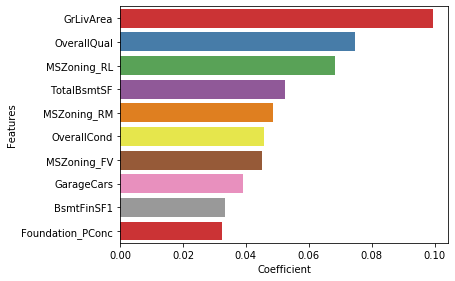

In [98]:
# Bar plot using ridge regression to determine the variables that would affect pricing of houses mostly

plt.figure(figsize=(20,20))
plt.subplot(4,3,1)
sns.barplot(y = 'Features', x='Coefficient', palette='Set1', data = df_3)
plt.show()

Above are the top 10 significant variables for predicting the price of a house using Ridge Regression.

Result :

    The optimal lambda value in case of Ridge and Lasso is as below:
        Ridge - 10
        Lasso - 0.0001

    The Mean Squared error in case of Ridge and Lasso are:
        Ridge - 0.013295
        Lasso - 0.013313

    The Mean Squared Error of Ridge is slightly lower than that of Lasso

    Although Ridge regression gives slightly better result than LASSO , but if we use ridge regression, we can not reduce the number of variables.So, Lasso Regression would be better.

Therefore, the factors that affects the price of Housing using Lasso are the GrLivArea, MSZoning_RL, MSZoning_RM, MSZoning_FV,  OverallQual, OverallCond, TotalBsmtSF, GarageCars, Foundation_PConc, BsmtFinSF1
 
